   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00


Saving insurance_extended_40k.csv to insurance_extended_40k (1).csv
Dataset shape: (40000, 13)

First 5 rows:


,age,sex,bmi,children,smoker,region,exercise_level,alcohol_consumption,chronic_disease,family_history,married,occupation_type,charges
0,48,male,29.2,0,no,southwest,2,1,0,1,1,1,11277.65
1,48,female,39.7,2,no,northwest,0,2,1,1,1,1,15609.85
2,34,male,33.4,0,yes,northwest,0,2,1,1,0,0,35301.29
3,41,male,32.1,3,yes,northeast,1,1,0,0,1,1,36327.26
4,40,male,29.3,1,no,southwest,1,1,1,1,1,1,11411.68



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  40000 non-null  int64  
 1   sex                  40000 non-null  object 
 2   bmi                  40000 non-null  float64
 3   children             40000 non-null  int64  
 4   smoker               40000 non-null  object 
 5   region               40000 non-null  object 
 6   exercise_level       40000 non-null  int64  
 7   alcohol_consumption  40000 non-null  int64  
 8   chronic_disease      40000 non-null  int64  
 9   family_history       40000 non-null  int64  
 10  married              40000 non-null  int64  
 11  occupation_type      40000 non-null  int64  
 12  charges              40000 non-null  float64
dtypes: float64(2), int64(8), object(3)
memory usage: 4.0+ MB
None

Summary statistics:


,age,bmi,children,exercise_level,alcohol_consumption,chronic_disease,family_history,married,occupation_type,charges
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.928750,30.017672,1.004825,0.999125,1.004375,0.498300,0.497975,0.499875,0.999800,23059.936632
std,13.514716,6.026337,1.003333,0.817521,0.818182,0.500003,0.500002,0.500006,0.819003,11634.956255
min,18.000000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4208.210000
25%,29.000000,25.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12065.762500
50%,41.000000,30.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,21449.205000
75%,53.000000,34.100000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,33992.767500
max,64.000000,52.500000,7.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,52050.380000


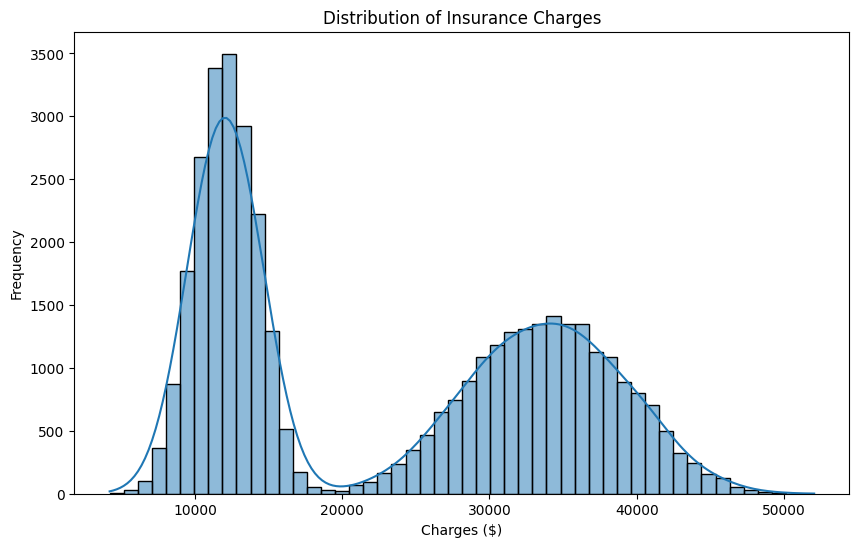

In [1]:
# Install necessary libraries (first time only)
!pip install catboost xgboost shap --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
import shap

# Load data from file upload
from google.colab import files
uploaded = files.upload()  # Upload insurance_extended_40k.csv

# Read data
df = pd.read_csv('insurance_extended_40k.csv')

# Initial exploration
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())
print("\nData types and missing values:")
print(df.info())
print("\nSummary statistics:")
display(df.describe())

# Check target distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=50, kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')
plt.show()


In [2]:
# Create new features
df['bmi_smoker'] = df['bmi'] * df['smoker'].map({'yes': 1, 'no': 0})
df['age_chronic'] = df['age'] * df['chronic_disease']
df['bmi_age'] = df['bmi'] * df['age']
df['children_smoker'] = df['children'] * df['smoker'].map({'yes': 1, 'no': 0})

# Prepare features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
categorical_features = ['sex', 'smoker', 'region', 'exercise_level',
                        'alcohol_consumption', 'chronic_disease',
                        'family_history', 'married', 'occupation_type']
numeric_features = ['age', 'bmi', 'children', 'bmi_smoker',
                   'age_chronic', 'bmi_age', 'children_smoker']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)



Evaluating Random Forest


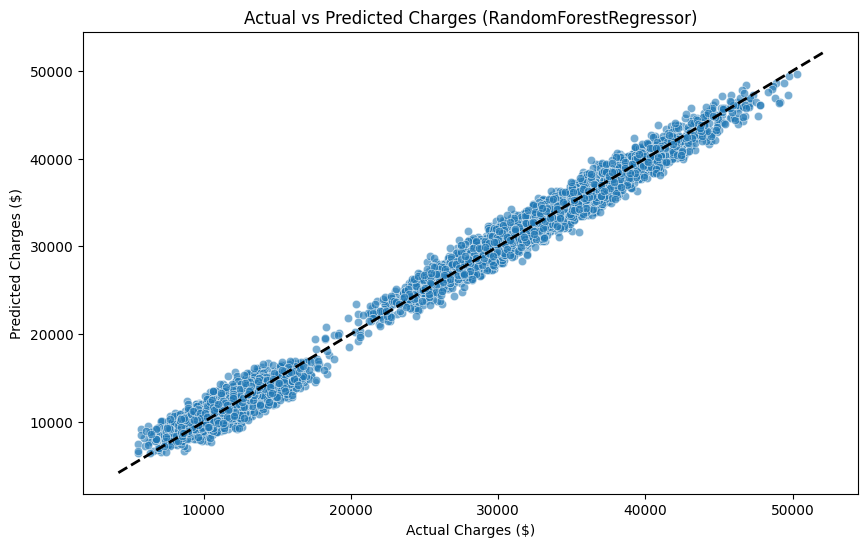

Test MAE: 845.46
Test RMSE: 1055.35
Test R²: 0.9917

Evaluating Gradient Boosting


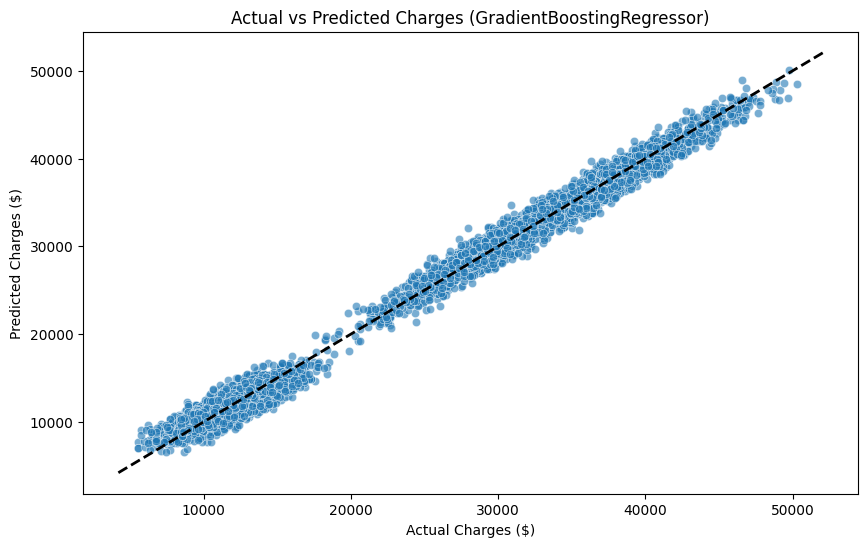

Test MAE: 814.89
Test RMSE: 1018.30
Test R²: 0.9923

Evaluating XGBoost


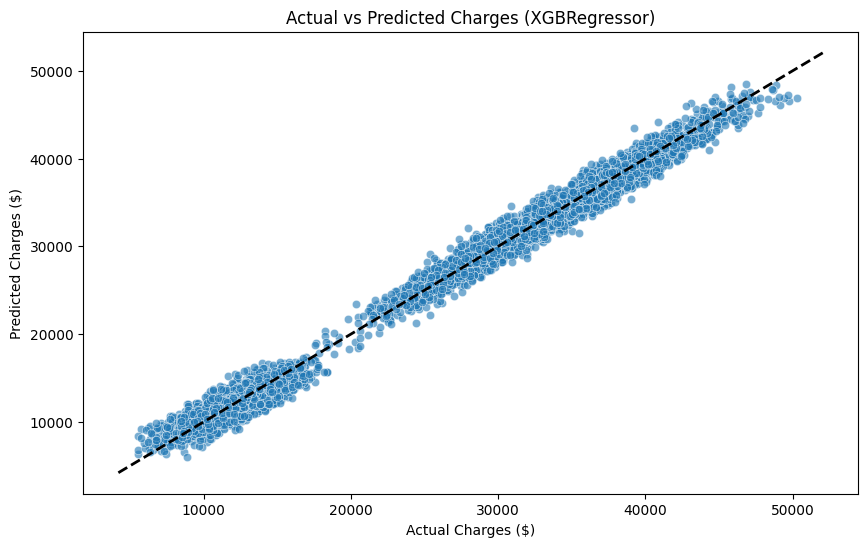

Test MAE: 854.73
Test RMSE: 1069.88
Test R²: 0.9915

Evaluating CatBoost


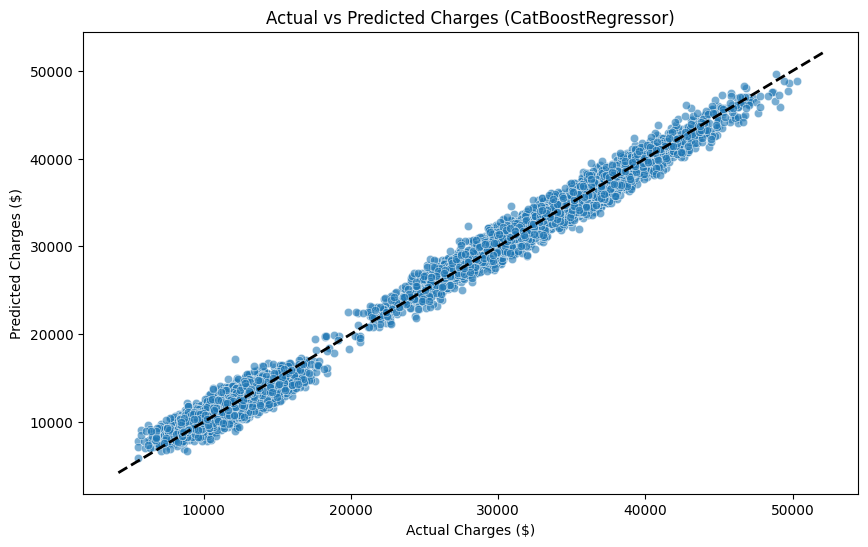

Test MAE: 822.02
Test RMSE: 1027.42
Test R²: 0.9922

Model Comparison:


,MAE_train,MAE_test,RMSE_train,RMSE_test,R2_train,R2_test
Random Forest,307.050185,845.463470,387.294427,1055.349718,0.998894,0.991718
Gradient Boosting,783.942060,814.886564,982.792320,1018.296493,0.992876,0.992290
XGBoost,610.129425,854.733391,779.283018,1069.881115,0.995521,0.991489
CatBoost,754.329787,822.024506,947.427113,1027.415721,0.993380,0.992151


In [3]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Evaluate model and return metrics"""
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    metrics = {
        'MAE_train': mean_absolute_error(y_train, y_pred_train),
        'MAE_test': mean_absolute_error(y_test, y_pred_test),
        'RMSE_train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE_test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'R2_train': r2_score(y_train, y_pred_train),
        'R2_test': r2_score(y_test, y_pred_test)
    }

    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.title(f'Actual vs Predicted Charges ({model.__class__.__name__})')
    plt.xlabel('Actual Charges ($)')
    plt.ylabel('Predicted Charges ($)')
    plt.show()

    return metrics

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    'CatBoost': CatBoostRegressor(iterations=200, random_state=42, verbose=0)
}

# Evaluate all models
results = {}
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Evaluating {name}")
    print(f"{'='*50}")
    metrics = evaluate_model(model, X_train_processed, X_test_processed, y_train, y_test)
    results[name] = metrics
    print(f"Test MAE: {metrics['MAE_test']:.2f}")
    print(f"Test RMSE: {metrics['RMSE_test']:.2f}")
    print(f"Test R²: {metrics['R2_test']:.4f}")

# Compare model performance
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
display(results_df)


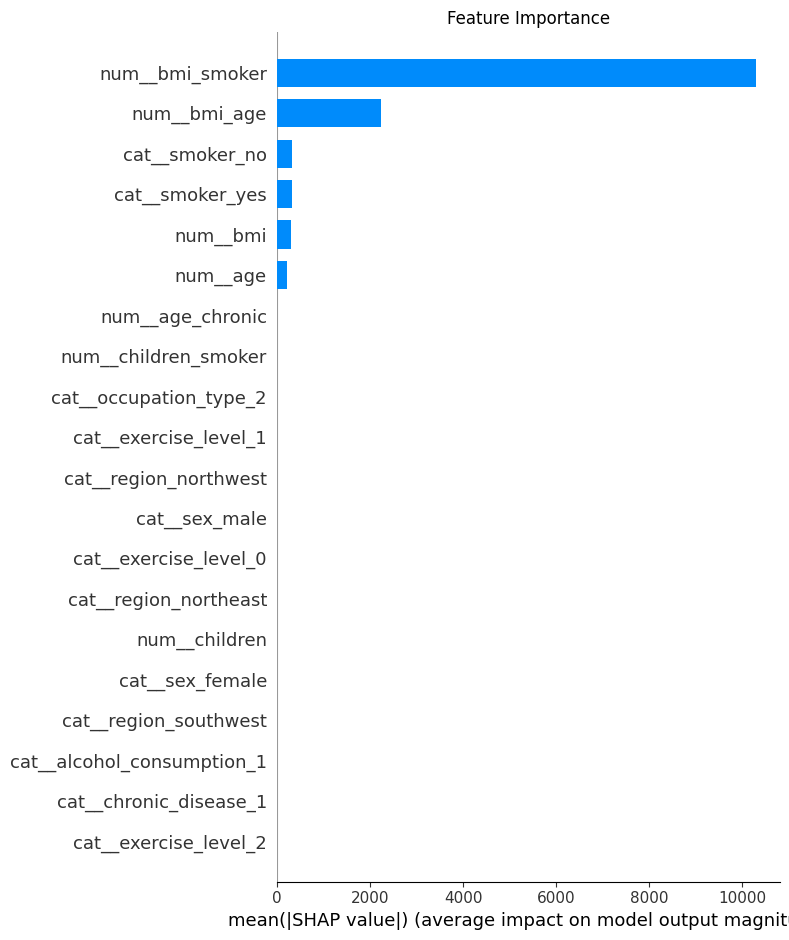

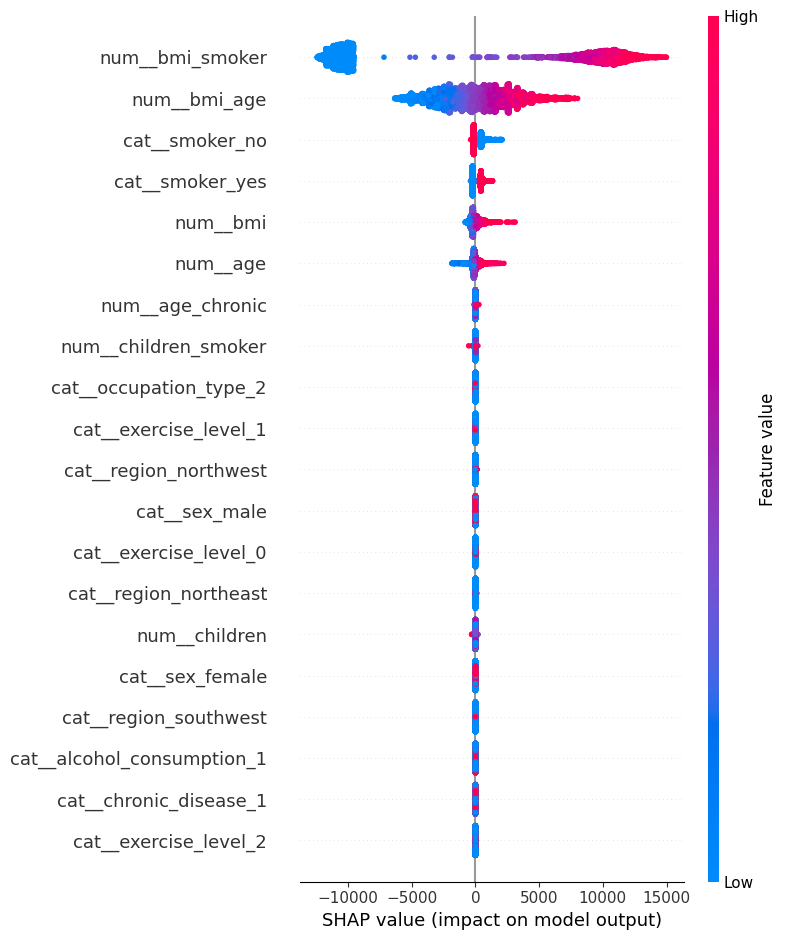

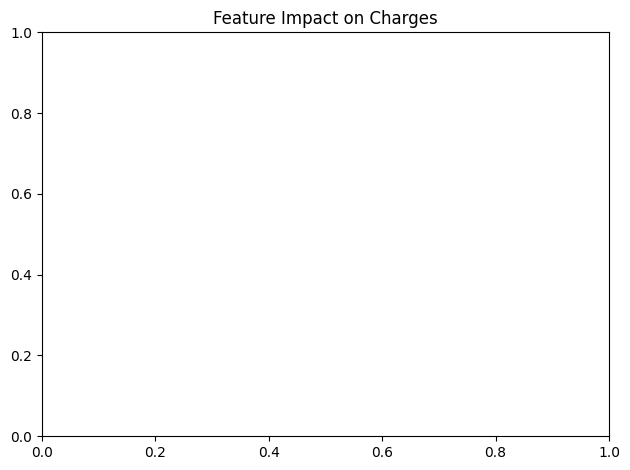


Explanation for sample #0:
Actual charge: $11365.21
Predicted charge: $9666.90


In [4]:
# Use best model for explainability
best_model = models['Gradient Boosting']  # Change if needed

# Refit on all training data (in case not trained yet)
best_model.fit(X_train_processed, y_train)

# Create explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_processed)

# Summary plot (bar)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_processed,
                 feature_names=preprocessor.get_feature_names_out(),
                 plot_type='bar', show=False)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Detailed summary plot (dot)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_processed,
                 feature_names=preprocessor.get_feature_names_out())
plt.title('Feature Impact on Charges')
plt.tight_layout()
plt.show()

# Force plot for a sample
sample_idx = 0
print(f"\nExplanation for sample #{sample_idx}:")
print(f"Actual charge: ${y_test.iloc[sample_idx]:.2f}")
print(f"Predicted charge: ${best_model.predict(X_test_processed[sample_idx].reshape(1, -1))[0]:.2f}")

shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values[sample_idx],
                X_test_processed[sample_idx],
                feature_names=preprocessor.get_feature_names_out())


In [5]:
import joblib

# Save model and preprocessor
joblib.dump(best_model, 'model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')


['preprocessor.pkl']